In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("../Basic_ML_Stuff/content/Social_Network_Ads.csv")

In [3]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
X = df.iloc[:,0:2]
y = df.iloc[:, -1]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 19ms/step - loss: 922.2716 - accuracy: 0.5094 - val_loss: 740.5543 - val_accuracy: 0.4000
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 395.3916 - accuracy: 0.5344 - val_loss: 337.8492 - val_accuracy: 0.6000
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 213.8065 - accuracy: 0.4469 - val_loss: 168.2895 - val_accuracy: 0.6000
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 166.1442 - accuracy: 0.5219 - val_loss: 43.9858 - val_accuracy: 0.4000
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 150.2640 - accuracy: 0.4969 - val_loss: 184.4379 - val_accuracy: 0.4000
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 107.1678 - accuracy: 0.5219 - val_loss: 41.0218 - val_accuracy: 0.4000
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 56.5007 - accuracy: 0.5031 - val_loss: 35.6125 - val_accur

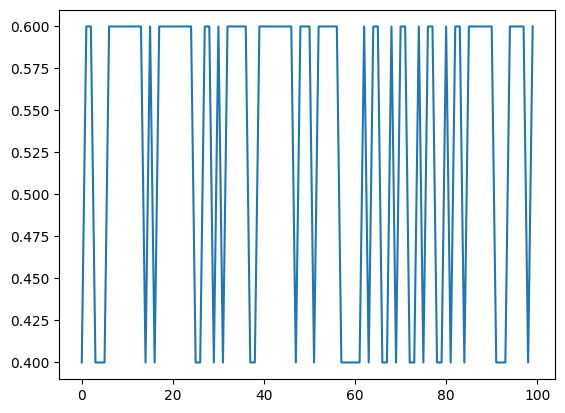

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

We can see that due to the scale difference of our inout columns the model was not able to converge well when training data was fed. The validation accuracy couldn't even cross 60%. Scale difference was between Age and Estimated Salary

#### Now, Let's scale the data and run the same architecture model

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
model1 = Sequential()

model1.add(Dense(128, activation='relu', input_dim=2))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history1 = model1.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100)


Epoch 1/100
10/10 [==============================] - 0s 14ms/step - loss: 0.7258 - accuracy: 0.4156 - val_loss: 0.6931 - val_accuracy: 0.6000
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6571 - accuracy: 0.7469 - val_loss: 0.6278 - val_accuracy: 0.7625
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6018 - accuracy: 0.7844 - val_loss: 0.5728 - val_accuracy: 0.7875
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5542 - accuracy: 0.8031 - val_loss: 0.5284 - val_accuracy: 0.7750
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5161 - accuracy: 0.8156 - val_loss: 0.4906 - val_accuracy: 0.7875
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4828 - accuracy: 0.8188 - val_loss: 0.4585 - val_accuracy: 0.7875
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4549 - accuracy: 0.8313 - val_loss: 0.4302 - val_accuracy: 0.7875
Epoch 8/100


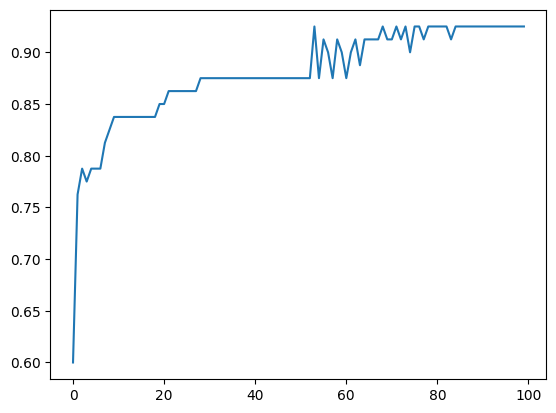

In [21]:
plt.plot(history1.history['val_accuracy'])